<a href="https://colab.research.google.com/github/A-Peoples/UFL-Stat-Scrapper/blob/main/Projects/Basic_UFL_Project_1_Graphing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Packages**

In [86]:
#importing packages
import pandas as pd
import numpy as np
import os
import urllib.request
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# **Importing Team Logos and Team Stats**

In [87]:
#importing rushing and passing columns
rushing = pd.read_csv("http://raw.githubusercontent.com/A-Peoples/UFL-Stat-Scrapper/refs/heads/main/Stats/2025/Stats%2BCombined%20Team%20Stats/ufl_rushing25.csv")
passing = pd.read_csv("http://raw.githubusercontent.com/A-Peoples/UFL-Stat-Scrapper/refs/heads/main/Stats/2025/Stats%2BCombined%20Team%20Stats/ufl_passing25.csv")

In [88]:
#creating a logos folder for UFL team logos
if not os.path.exists("logos"):
  os.makedirs('logos')

#using a for loop to cycle through team logos
teams = passing.team.unique()
team_logos = []
for team in teams:
  team_logo = "https://raw.githubusercontent.com/A-Peoples/UFL-Stat-Scrapper/refs/heads/main/logos/2025/" + team + ".png"
  team_logos.append(team_logo)

#creating a dataframe with name and taem logo for easier filtering
team_decr = pd.DataFrame({'team': teams,
                          'team_logo': team_logos})


In [89]:
team_abbr = []
logo_paths = []

#downloading logos onto runtime
for team in range(len(team_decr)):
    urllib.request.urlretrieve(team_decr['team_logo'][team], f"logos/{team_decr['team'][team]}.tif")
    logo_paths.append(f"logos/{team_decr['team'][team]}.tif")
    team_abbr.append(team_decr['team'][team])
    print("Successfully downloaded " + team_decr['team'].iloc[team] + ".tif!")

Successfully downloaded dc.tif!
Successfully downloaded dallas.tif!
Successfully downloaded birmingham.tif!
Successfully downloaded st-louis.tif!
Successfully downloaded memphis.tif!
Successfully downloaded michigan.tif!
Successfully downloaded houston.tif!
Successfully downloaded san-antonio.tif!


In [95]:
#filtering rushing columns and passing columns to only include overall team stats
rushing_team = rushing.loc[rushing['Name'] == 'Team']
passing_team = passing.loc[passing['Name'] == 'Team']

rushing_team = rushing_team.rename(columns={'TD': 'Rush_TD'})
passing_team = passing_team.rename(columns={'TD': 'Pass_TD'})

#filtering rushing and passing columns to only contain the team name and rushing/passing attempts
rush_att = rushing_team[['Att', 'team', 'Net', 'Rush_TD']]
pass_att = passing_team[['A', 'team', 'Yds', 'Pass_TD']]

In [99]:
#merging and renaming columns from passing and rushing
rush_pass_freq = rush_att.merge(pass_att)
rush_pass_freq = rush_pass_freq.merge(team_decr)

rush_pass_freq = rush_pass_freq.rename(columns={"Att": "rush_att",
                                                'A': 'pass_att',
                                                'Net': 'rush_yds',
                                                'Yds': 'pass_yds'
                                                })

rush_pass_freq['avg_rush_yds_att'] = rush_pass_freq['rush_yds'] / rush_pass_freq['rush_att']
rush_pass_freq['avg_pass_yds_att'] = rush_pass_freq['pass_yds'] / rush_pass_freq['pass_att']

rush_pass_freq['avg_rush_yds_g'] = rush_pass_freq['rush_yds'] / 10
rush_pass_freq['avg_pass_yds_g'] = rush_pass_freq['pass_yds'] / 10
#adding the teampath for easier filter
team_logo_path = []
for team in teams:
  team_logo_path.append("/content/logos/"+team+".tif")

rush_pass_freq['imgpath'] = team_logo_path

paths = rush_pass_freq['imgpath']

pd.set_option('expand_frame_repr', False)
print(rush_pass_freq[['team', 'rush_att', 'rush_yds', 'avg_rush_yds_att', 'avg_rush_yds_g', 'Rush_TD', 'pass_att', 'pass_yds', 'avg_pass_yds_att', 'avg_pass_yds_g', 'Pass_TD', 'imgpath']])

          team  rush_att  rush_yds  avg_rush_yds_att  avg_rush_yds_g  Rush_TD  pass_att  pass_yds  avg_pass_yds_att  avg_pass_yds_g  Pass_TD                         imgpath
0           dc       252       989          3.924603            98.9        7       342      2521          7.371345           252.1       20           /content/logos/dc.tif
1       dallas       234       921          3.935897            92.1       11       317      2300          7.255521           230.0       10       /content/logos/dallas.tif
2   birmingham       252      1058          4.198413           105.8       10       313      2213          7.070288           221.3       16   /content/logos/birmingham.tif
3     st-louis       304      1442          4.743421           144.2       16       198      1456          7.353535           145.6        7     /content/logos/st-louis.tif
4      memphis       242       858          3.545455            85.8        7       273      1662          6.087912           166.2    

# **Visualizations**

Text(0.5, 1.0, 'UFL Teams Average Rush Yards/Game - Frequency')

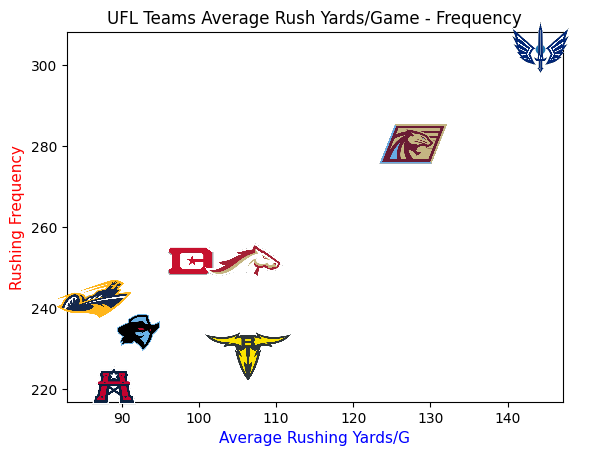

In [93]:
#creating a function to read the downloaded images' data in the runtime and change the zoom
def getImage(path):
  return OffsetImage(plt.imread(path, format='tif'), zoom=0.09)

fig, ax = plt.subplots()

x = rush_pass_freq['avg_rush_yds_g']
y = rush_pass_freq['rush_att']
plt.scatter(x, y)

#creating a for loop to show images instead of dots on the scatterplot
for x0, y0, path in zip(x, y,paths):
    ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False, alpha=0)
    ax.add_artist(ab)


#labelling the scatterplot
plt.ylabel("Rushing Frequency", fontdict={'fontsize':11,
                                          'color': 'red'})
plt.xlabel("Average Rushing Yards/G", fontdict={'fontsize':11,
                                          'color': 'blue'})


plt.title("UFL Teams Average Rush Yards/Game - Frequency")



Text(0.5, 1.0, 'UFL Teams Average Passing Yards/Game - Frequency')

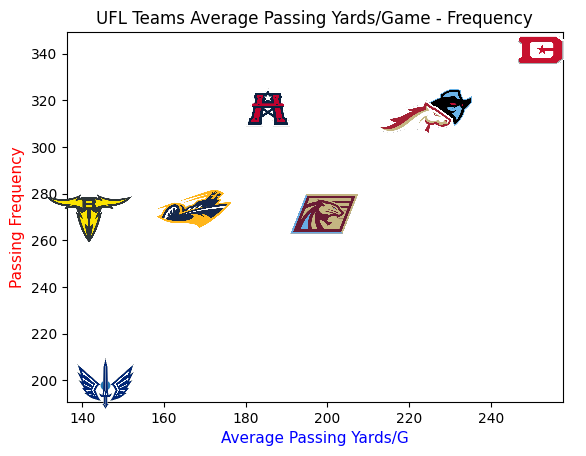

In [94]:
#creating a function to read the downloaded images' data in the runtime and change the zoom
def getImage(path):
  return OffsetImage(plt.imread(path, format='tif'), zoom=0.09)

fig, ax = plt.subplots()

x = rush_pass_freq['avg_pass_yds_g']
y = rush_pass_freq['pass_att']
plt.scatter(x, y)

#creating a for loop to show images instead of dots on the scatterplot
for x0, y0, path in zip(x, y,paths):
    ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False, alpha=0)
    ax.add_artist(ab)


#labelling the scatterplot
plt.ylabel("Passing Frequency", fontdict={'fontsize':11,
                                          'color': 'red'})
plt.xlabel("Average Passing Yards/G", fontdict={'fontsize':11,
                                          'color': 'blue'})


plt.title("UFL Teams Average Passing Yards/Game - Frequency")



Text(0.5, 1.0, 'UFL Teams Pass-Rush TD Split')

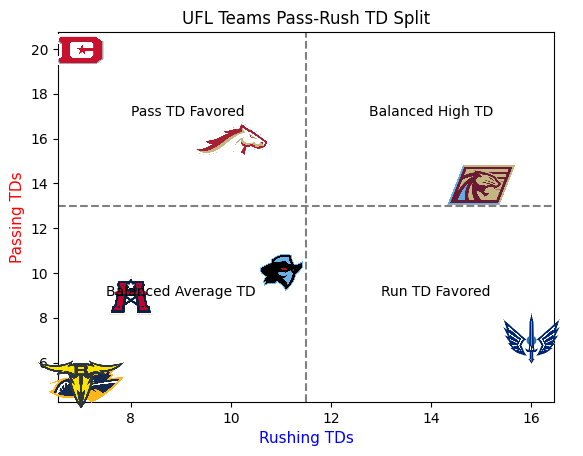

In [128]:
#creating a function to read the downloaded images' data in the runtime and change the zoom
def getImage(path):
  return OffsetImage(plt.imread(path, format='tif'), zoom=0.09)

fig, ax = plt.subplots()

x = rush_pass_freq['Rush_TD']
y = rush_pass_freq['Pass_TD']
plt.scatter(x, y)

#creating a for loop to show images instead of dots on the scatterplot
for x0, y0, path in zip(x, y,paths):
    ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False, alpha=0)
    ax.add_artist(ab)

#creating quadrants
plt.axvline(x=11.5, color='grey', linestyle="--")
plt.axhline(y=13, color='grey', linestyle="--")

#labelling the scatterplot
plt.ylabel("Passing TDs", fontdict={'fontsize':11,
                                          'color': 'red'})
plt.xlabel("Rushing TDs", fontdict={'fontsize':11,
                                          'color': 'blue'})

plt.annotate("Pass TD Favored", (8, 17), fontsize=10, color='black')
plt.annotate("Balanced Average TD", (7.5, 9), fontsize=10, color='black')
plt.annotate("Run TD Favored", (13, 9), fontsize=10, color='black')
plt.annotate("Balanced High TD", (12.75, 17), fontsize=10, color='black')
plt.title("UFL Teams Pass-Rush TD Split")



Text(0.5, 1.0, 'UFL Teams Pass-Rush Frequency')

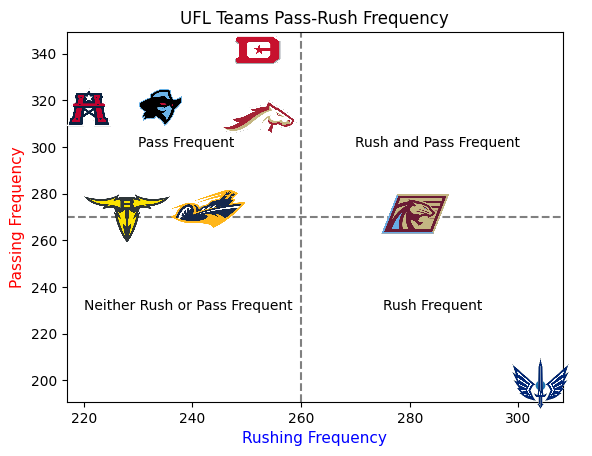

In [100]:
#creating a function to read the downloaded images' data in the runtime and change the zoom
def getImage(path):
  return OffsetImage(plt.imread(path, format='tif'), zoom=0.09)

fig, ax = plt.subplots()

x = rush_pass_freq['rush_att']
y = rush_pass_freq['pass_att']
plt.scatter(x, y)

#creating a for loop to show images instead of dots on the scatterplot
for x0, y0, path in zip(x, y,paths):
    ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False, alpha=0)
    ax.add_artist(ab)

#creating quadrants
plt.axvline(x=260, color='grey', linestyle="--")
plt.axhline(y=270, color='grey', linestyle="--")

#labelling the scatterplot
plt.ylabel("Passing Frequency", fontdict={'fontsize':11,
                                          'color': 'red'})
plt.xlabel("Rushing Frequency", fontdict={'fontsize':11,
                                          'color': 'blue'})

plt.annotate("Pass Frequent", (230, 300), fontsize=10, color='black')
plt.annotate("Neither Rush or Pass Frequent", (220, 230), fontsize=10, color='black')
plt.annotate("Rush Frequent", (275, 230), fontsize=10, color='black')
plt.annotate("Rush and Pass Frequent", (270, 300), fontsize=10, color='black')
plt.title("UFL Teams Pass-Rush Frequency")

